<div style="background-color:#eef6fb; padding:25px; border-radius:20px; border: 1px solid #c7d6e0; font-family:Arial, sans-serif;">

<h1 style="color:#1b3b6f; text-align:center; font-size:1.8em; font-weight:bold;">🌊 Global Water Consumption Forecasting Project</h1>

<p style="color:#34495e; font-size:14px; line-height:1.6; text-align:justify;">
Water is one of the most critical resources on our planet, and understanding its consumption patterns is essential 
for sustainable management. This project dives into historical global water consumption data (2000–2024) 
and predicts future trends up to 2030 using advanced machine learning techniques. 
Through a combination of data analysis, visualizations, and predictive modeling, this work provides actionable 
insights into water usage patterns across countries and sectors.
</p>

<h2 style="color:#1b3b6f; font-size:1.3em; margin-top:20px;">🎯 Project Objectives</h2>
<ul style="color:#34495e; font-size:13px; line-height:1.5;">
    <li>Analyze historical global water consumption trends across different countries and sectors.</li>
    <li>Identify top water-consuming countries and sector-wise distribution (Agriculture, Industry, Household).</li>
    <li>Develop predictive models to forecast global water consumption up to 2030.</li>
    <li>Create data-driven visualizations to support informed decision-making and planning.</li>
    <li>Explore correlations between environmental factors (e.g., rainfall, groundwater depletion) and water usage.</li>
</ul>

<h2 style="color:#1b3b6f; font-size:1.3em; margin-top:20px;">💡 Why This Project Was Chosen</h2>
<p style="color:#34495e; font-size:14px; line-height:1.6; text-align:justify;">
Water scarcity is an escalating global challenge impacting millions of people and ecosystems. This project was chosen 
to leverage data science in addressing a real-world problem. By forecasting future water demand, it can guide governments, 
environmental organizations, and communities in planning sustainable water management strategies and mitigating potential shortages.
</p>

<h2 style="color:#1b3b6f; font-size:1.3em; margin-top:20px;">🛠 What Has Been Done in the Project</h2>
<ul style="color:#34495e; font-size:13px; line-height:1.5;">
    <li>Collected and cleaned a comprehensive global water consumption dataset (2000–2024) including per capita usage, sectoral distribution, rainfall impact, and groundwater depletion.</li>
    <li>Performed extensive exploratory data analysis with advanced visualizations: line plots, bar plots, bubble charts, violin plots, radar charts, stacked area plots, and 3D scatter/contour plots.</li>
    <li>Developed a high-performing Convolutional Neural Network (CNN) model to forecast global water consumption.</li>
    <li>Predicted water consumption for 2025–2030 and highlighted countries with the highest projected usage.</li>
    <li>Produced interactive and static visualizations to interpret predictions and historical trends effectively.</li>
</ul>

<h2 style="color:#1b3b6f; font-size:1.3em; margin-top:20px;">🌟 Expected Impact and Benefits</h2>
<p style="color:#34495e; font-size:14px; line-height:1.6; text-align:justify;">
The outcomes of this project can serve as a decision-support tool for policymakers, water resource managers, and environmental agencies. By understanding water usage patterns and forecasting future demand, stakeholders can:
<ul style="color:#34495e; font-size:13px; line-height:1.5;">
    <li>Plan sustainable water management strategies at national and international levels.</li>
    <li>Identify high-risk regions prone to water scarcity.</li>
    <li>Optimize resource allocation for agriculture, industry, and households.</li>
    <li>Develop policies to mitigate overconsumption and protect water resources.</li>
</ul>
</p>

<p style="color:#1b3b6f; font-size:14px; font-weight:bold; text-align:center; margin-top:15px;">
This project seamlessly integrates data analysis, advanced visualization, and predictive modeling to provide a holistic 
understanding of global water consumption trends and their future implications.
</p>

</div>

<h2 style="
  color:#1e3a8a;
  background:linear-gradient(90deg, #e0f7f4, #c7e9e2);
  padding:14px 20px;
  border-radius:12px;
  font-family:'Segoe UI', 'Trebuchet MS', sans-serif;
  font-style:italic;
  font-weight:600;
  letter-spacing:0.7px;
  text-shadow:1px 1px 2px rgba(0,0,0,0.1);
  border-left:6px solid #2e8b57;
">
 Install and Import Dependencies
</h2>

In [1]:

!pip install geopandas folium plotly lightgbm xgboost shap tensorflow keras --quiet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import geopandas as gpd
import folium
import plotly.express as px
from datetime import datetime

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

import xgboost as xgb
import lightgbm as lgb
import shap
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

2025-10-30 11:01:03.743343: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761822063.954894      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761822064.015721      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


<h2 style="
  color:#1e3a8a;
  background:linear-gradient(90deg, #e0f7f4, #c7e9e2);
  padding:14px 20px;
  border-radius:12px;
  font-family:'Segoe UI', 'Trebuchet MS', sans-serif;
  font-style:italic;
  font-weight:600;
  letter-spacing:0.7px;
  text-shadow:1px 1px 2px rgba(0,0,0,0.1);
  border-left:6px solid #2e8b57;
">
Load Dataset
</h2>

In [2]:
DATA_DIR = "/kaggle/input/global-water-consumption-dataset-2000-2024"
file_name = "/kaggle/input/global-water-consumption-dataset-2000-2024/cleaned_global_water_consumption.csv"  

df = pd.read_csv(os.path.join(DATA_DIR, file_name))
print(" Data loaded successfully:", df.shape)
df.head()

 Data loaded successfully: (500, 10)


,Country,Year,Total Water Consumption (Billion Cubic Meters),Per Capita Water Use (Liters per Day),Agricultural Water Use (%),Industrial Water Use (%),Household Water Use (%),Rainfall Impact (Annual Precipitation in mm),Groundwater Depletion Rate (%),Water Scarcity Level
0,Argentina,2000,481.490000,235.431429,48.550000,20.844286,30.100000,1288.698571,3.255714,Moderate
1,Argentina,2001,455.063000,299.551000,48.465000,26.943000,22.550000,1371.729000,3.120000,Moderate
2,Argentina,2002,482.749231,340.124615,50.375385,29.042308,23.349231,1590.305385,2.733846,Moderate
3,Argentina,2003,452.660000,326.756667,49.086667,30.476000,24.440000,1816.012667,2.708000,Moderate
4,Argentina,2004,634.566000,230.346000,38.670000,36.670000,23.924000,815.998000,1.902000,Moderate


<h2 style="
  color:#1e3a8a;
  background:linear-gradient(90deg, #e0f7f4, #c7e9e2);
  padding:14px 20px;
  border-radius:12px;
  font-family:'Segoe UI', 'Trebuchet MS', sans-serif;
  font-style:italic;
  font-weight:600;
  letter-spacing:0.7px;
  text-shadow:1px 1px 2px rgba(0,0,0,0.1);
  border-left:6px solid #2e8b57;
">
Data Cleaning
</h2>

In [3]:
df.columns = [
    'Country', 'Year', 'Total_Water_Consumption_BCM',
    'Per_Capita_Water_Use_Liters_Day', 'Agricultural_Water_Use_Pct',
    'Industrial_Water_Use_Pct', 'Household_Water_Use_Pct',
    'Rainfall_Impact_mm', 'Groundwater_Depletion_Pct',
    'Water_Scarcity_Level'
]

df = df.drop_duplicates()
df = df.fillna(method='ffill').fillna(method='bfill')
df['Year'] = df['Year'].astype(int)

print(" Cleaned columns:", df.columns.tolist())
df.info()

 Cleaned columns: ['Country', 'Year', 'Total_Water_Consumption_BCM', 'Per_Capita_Water_Use_Liters_Day', 'Agricultural_Water_Use_Pct', 'Industrial_Water_Use_Pct', 'Household_Water_Use_Pct', 'Rainfall_Impact_mm', 'Groundwater_Depletion_Pct', 'Water_Scarcity_Level']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          500 non-null    object 
 1   Year                             500 non-null    int64  
 2   Total_Water_Consumption_BCM      500 non-null    float64
 3   Per_Capita_Water_Use_Liters_Day  500 non-null    float64
 4   Agricultural_Water_Use_Pct       500 non-null    float64
 5   Industrial_Water_Use_Pct         500 non-null    float64
 6   Household_Water_Use_Pct          500 non-null    float64
 7   Rainfall_Impact_mm               500 non-null    float64
 8   Ground

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.


<h2 style="
  color:#1e3a8a;
  background:linear-gradient(90deg, #e0f7f4, #c7e9e2);
  padding:14px 20px;
  border-radius:12px;
  font-family:'Segoe UI', 'Trebuchet MS', sans-serif;
  font-style:italic;
  font-weight:600;
  letter-spacing:0.7px;
  text-shadow:1px 1px 2px rgba(0,0,0,0.1);
  border-left:6px solid #2e8b57;
">
Comprehensive Exploratory Data Analysis (EDA) on Global Water Consumption
</h2>

Dataset Shape: (500, 10)

Columns:
 ['Country', 'Year', 'Total_Water_Consumption_BCM', 'Per_Capita_Water_Use_Liters_Day', 'Agricultural_Water_Use_Pct', 'Industrial_Water_Use_Pct', 'Household_Water_Use_Pct', 'Rainfall_Impact_mm', 'Groundwater_Depletion_Pct', 'Water_Scarcity_Level']

Missing Values:
 Country                            0
Year                               0
Total_Water_Consumption_BCM        0
Per_Capita_Water_Use_Liters_Day    0
Agricultural_Water_Use_Pct         0
Industrial_Water_Use_Pct           0
Household_Water_Use_Pct            0
Rainfall_Impact_mm                 0
Groundwater_Depletion_Pct          0
Water_Scarcity_Level               0
dtype: int64


use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


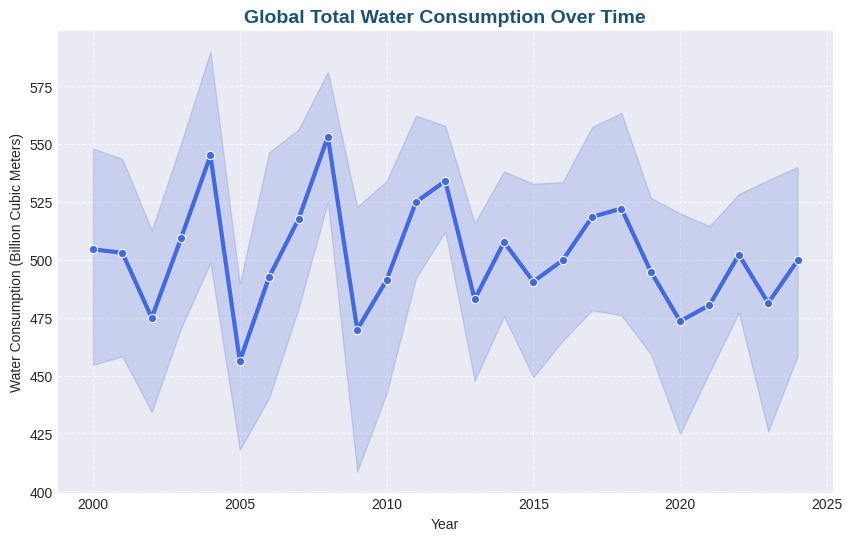

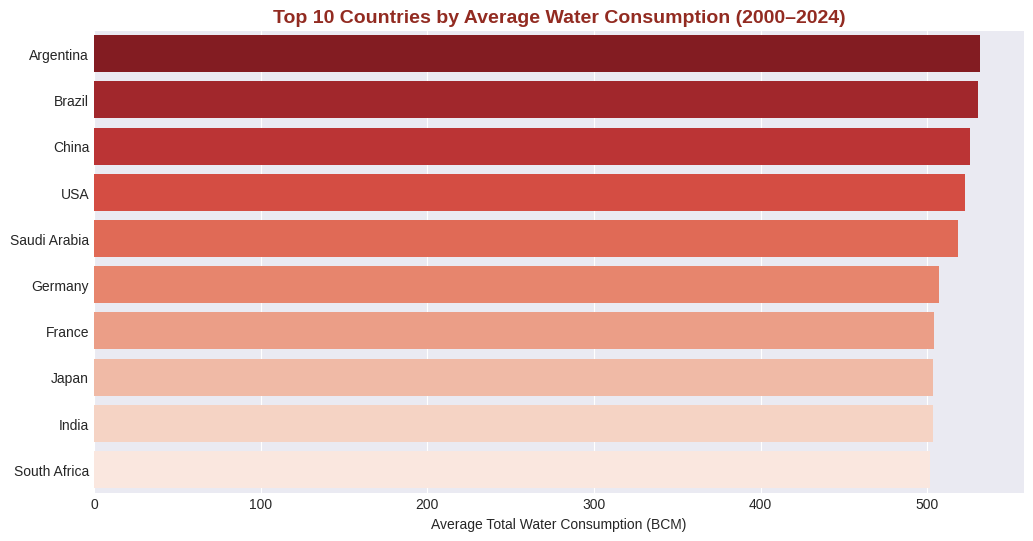

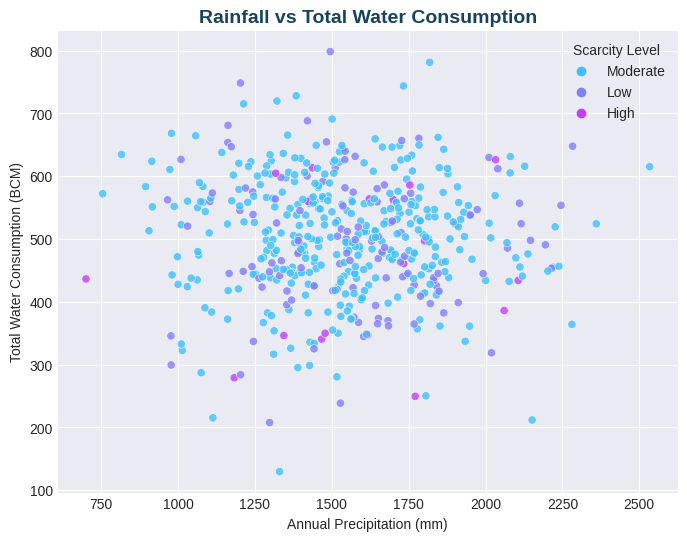

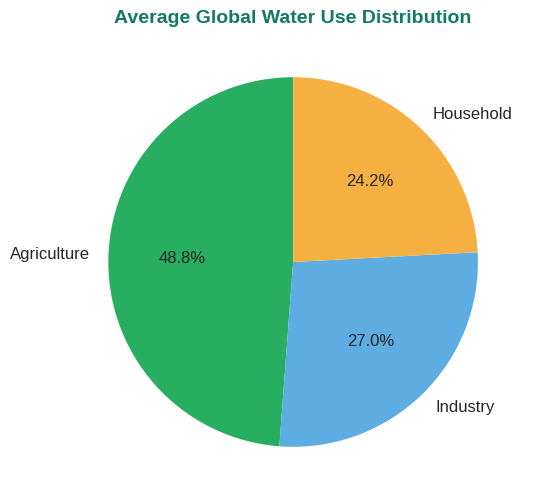

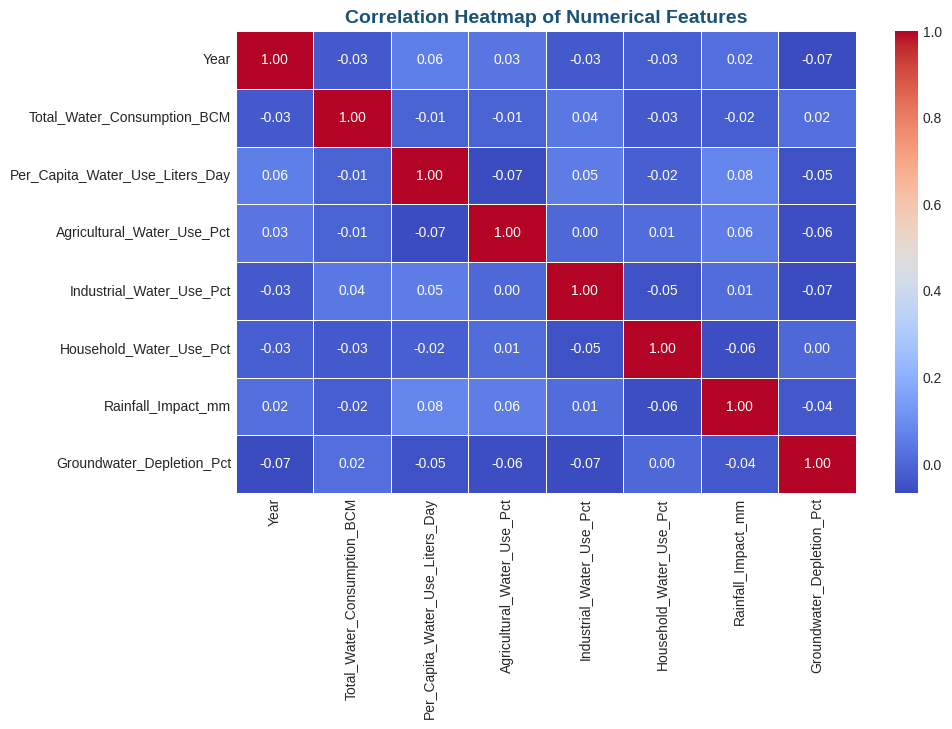

In [4]:

plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("coolwarm")

print("Dataset Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum())

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Total_Water_Consumption_BCM', color='royalblue', linewidth=3, marker='o')
plt.title("Global Total Water Consumption Over Time", fontsize=14, fontweight='bold', color="#1a5276")
plt.xlabel("Year")
plt.ylabel("Water Consumption (Billion Cubic Meters)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

top10_countries = df.groupby("Country")["Total_Water_Consumption_BCM"].mean().nlargest(10).reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=top10_countries, x='Total_Water_Consumption_BCM', y='Country', palette='Reds_r')
plt.title("Top 10 Countries by Average Water Consumption (2000–2024)", fontsize=14, fontweight='bold', color="#922b21")
plt.xlabel("Average Total Water Consumption (BCM)")
plt.ylabel("")
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Rainfall_Impact_mm', y='Total_Water_Consumption_BCM',
                hue='Water_Scarcity_Level', palette='cool', alpha=0.8)
plt.title("Rainfall vs Total Water Consumption", fontsize=14, fontweight='bold', color="#154360")
plt.xlabel("Annual Precipitation (mm)")
plt.ylabel("Total Water Consumption (BCM)")
plt.legend(title='Scarcity Level')
plt.show()

plt.figure(figsize=(8,6))
avg_use = df[['Agricultural_Water_Use_Pct', 'Industrial_Water_Use_Pct', 'Household_Water_Use_Pct']].mean()
colors = ['#27ae60', '#5dade2', '#f5b041']
plt.pie(avg_use, labels=['Agriculture', 'Industry', 'Household'], autopct='%1.1f%%',
        startangle=90, colors=colors, textprops={'fontsize': 12})
plt.title("Average Global Water Use Distribution", fontsize=14, fontweight='bold', color="#117a65")
plt.show()

plt.figure(figsize=(10, 6))
corr = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontsize=14, fontweight='bold', color="#1a5276")
plt.show()

if 'continent' in df.columns:
    plt.figure(figsize=(10,6))
    sns.lineplot(data=df, x='Year', y='Total_Water_Consumption_BCM', hue='continent', linewidth=2)
    plt.title("Water Consumption Trends by Continent", fontsize=14, fontweight='bold', color="#6c3483")
    plt.xlabel("Year")
    plt.ylabel("Water Consumption (BCM)")
    plt.legend(title='Continent')
    plt.show()

<h2 style="
  color:#1e3a8a;
  background:linear-gradient(90deg, #e0f7f4, #c7e9e2);
  padding:14px 20px;
  border-radius:12px;
  font-family:'Segoe UI', 'Trebuchet MS', sans-serif;
  font-style:italic;
  font-weight:600;
  letter-spacing:0.7px;
  text-shadow:1px 1px 2px rgba(0,0,0,0.1);
  border-left:6px solid #2e8b57;
">
Creative and Multi-Dimensional Visualizations of Water Usage Patterns
</h2>

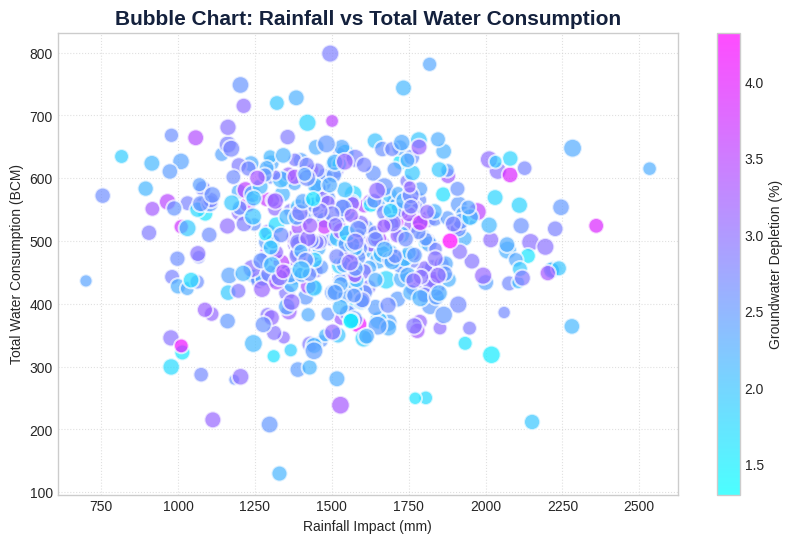

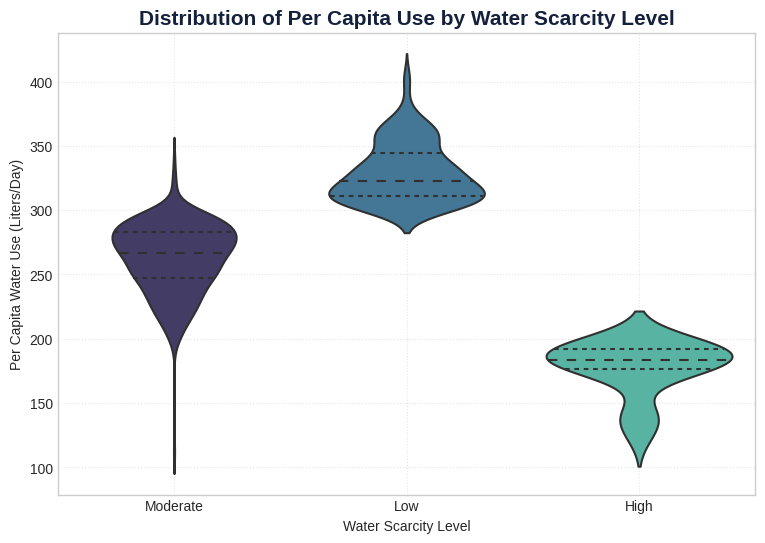

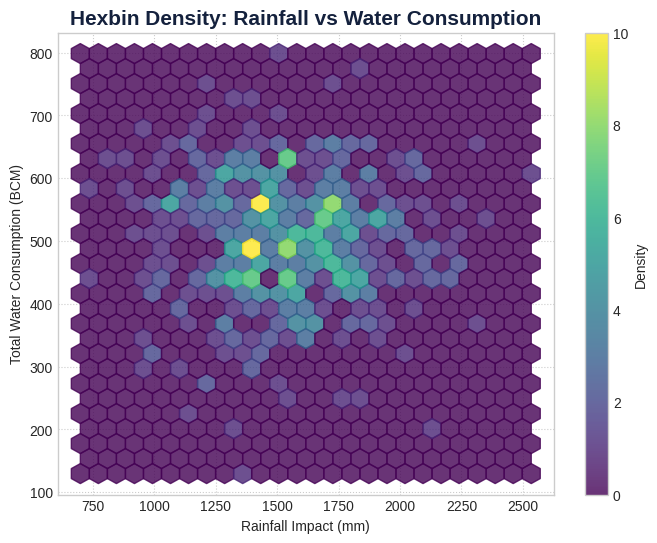

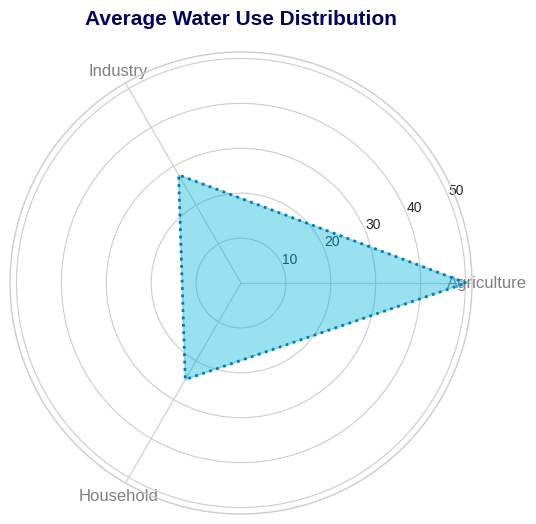

In [5]:

from math import pi

plt.style.use("seaborn-v0_8-whitegrid")

# Bubble Chart
plt.figure(figsize=(10,6))
bubble_size = df['Per_Capita_Water_Use_Liters_Day'] / 2
plt.scatter(df['Rainfall_Impact_mm'], df['Total_Water_Consumption_BCM'],
            s=bubble_size, c=df['Groundwater_Depletion_Pct'],
            cmap='cool', alpha=0.7, edgecolors='white', linewidth=1.5)
plt.title("Bubble Chart: Rainfall vs Total Water Consumption", fontsize=15, fontweight='bold', color="#14213d")
plt.xlabel("Rainfall Impact (mm)")
plt.ylabel("Total Water Consumption (BCM)")
plt.grid(True, linestyle=':', alpha=0.6)
plt.colorbar(label='Groundwater Depletion (%)')
plt.show()

# Violin Plot
plt.figure(figsize=(9,6))
sns.violinplot(data=df, x='Water_Scarcity_Level', y='Per_Capita_Water_Use_Liters_Day',
               palette='mako', inner='quartile')
plt.title("Distribution of Per Capita Use by Water Scarcity Level", fontsize=15, fontweight='bold', color="#14213d")
plt.xlabel("Water Scarcity Level")
plt.ylabel("Per Capita Water Use (Liters/Day)")
plt.grid(True, linestyle=':', alpha=0.5)
plt.show()

# Hexbin Density Plot
plt.figure(figsize=(8,6))
plt.hexbin(df['Rainfall_Impact_mm'], df['Total_Water_Consumption_BCM'], gridsize=25, cmap='viridis', alpha=0.8)
plt.title("Hexbin Density: Rainfall vs Water Consumption", fontsize=15, fontweight='bold', color="#14213d")
plt.xlabel("Rainfall Impact (mm)")
plt.ylabel("Total Water Consumption (BCM)")
plt.colorbar(label='Density')
plt.grid(True, linestyle=':')
plt.show()

# Radar (Spider) Chart
categories = ['Agricultural_Water_Use_Pct', 'Industrial_Water_Use_Pct', 'Household_Water_Use_Pct']
values = df[categories].mean().values.flatten().tolist()
values += values[:1]
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], ['Agriculture', 'Industry', 'Household'], color='grey', size=12)
ax.plot(angles, values, linewidth=2, linestyle=':', color='#0077b6')
ax.fill(angles, values, color='#00b4d8', alpha=0.4)
plt.title("Average Water Use Distribution", size=15, fontweight='bold', color="#03045e", pad=20)
plt.show()


<h2 style="
  color:#1e3a8a;
  background:linear-gradient(90deg, #e0f7f4, #c7e9e2);
  padding:14px 20px;
  border-radius:12px;
  font-family:'Segoe UI', 'Trebuchet MS', sans-serif;
  font-style:italic;
  font-weight:600;
  letter-spacing:0.7px;
  text-shadow:1px 1px 2px rgba(0,0,0,0.1);
  border-left:6px solid #2e8b57;
">
Advanced Data Visualization for Water Consumption Analysis
</h2>

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
The figure layout has changed to tight


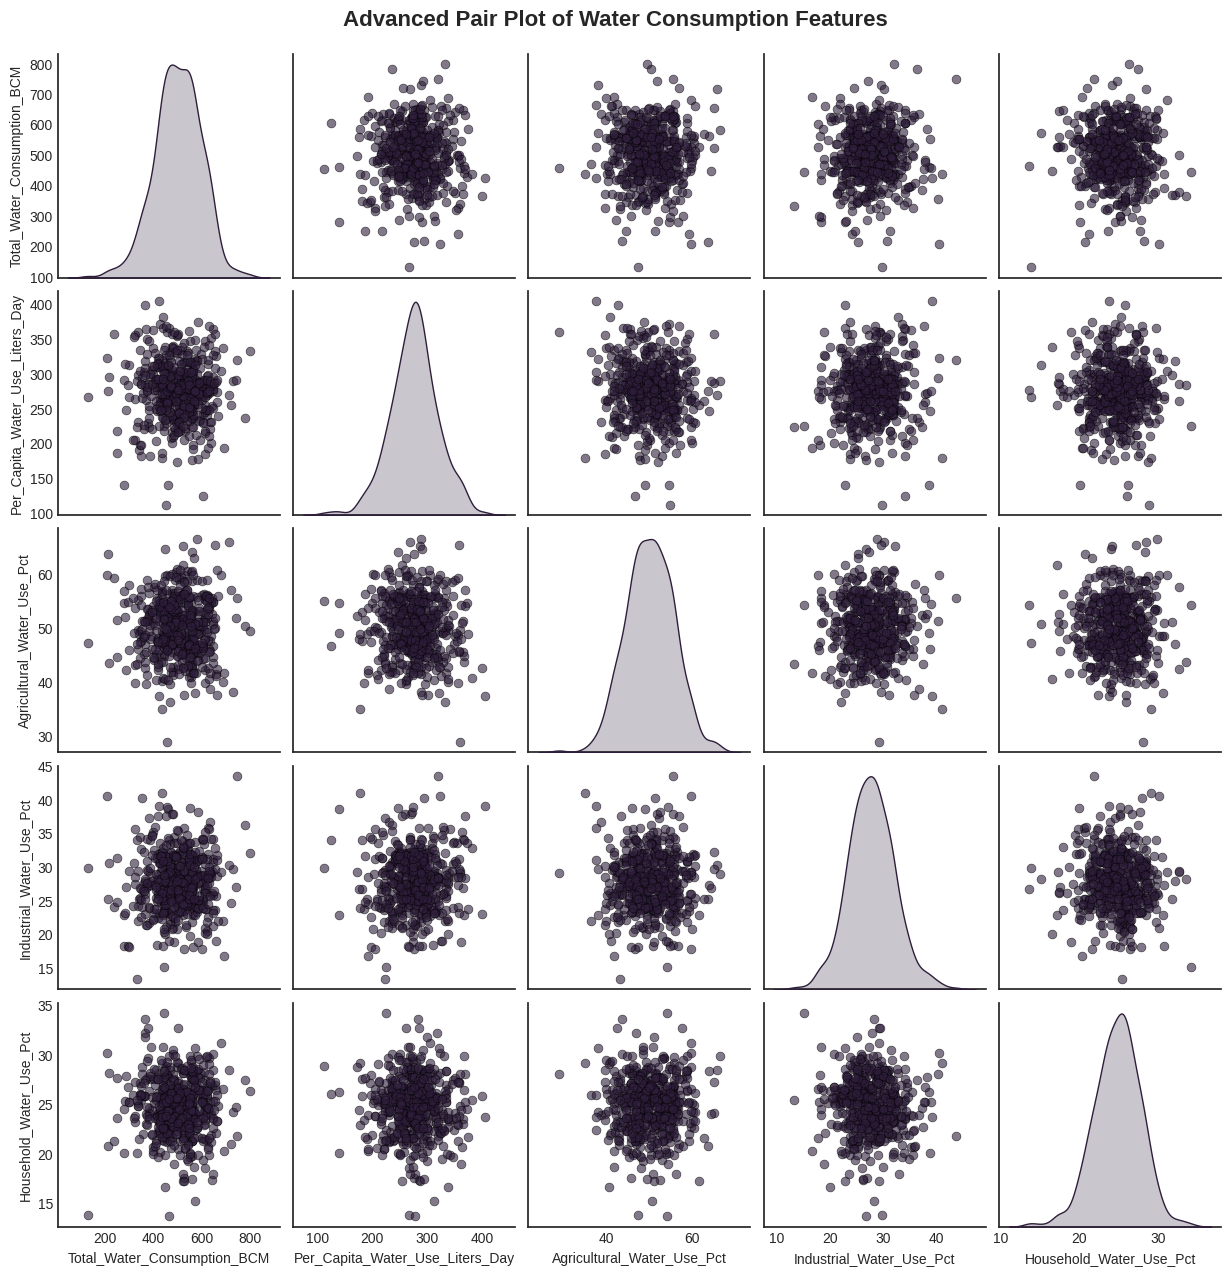

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


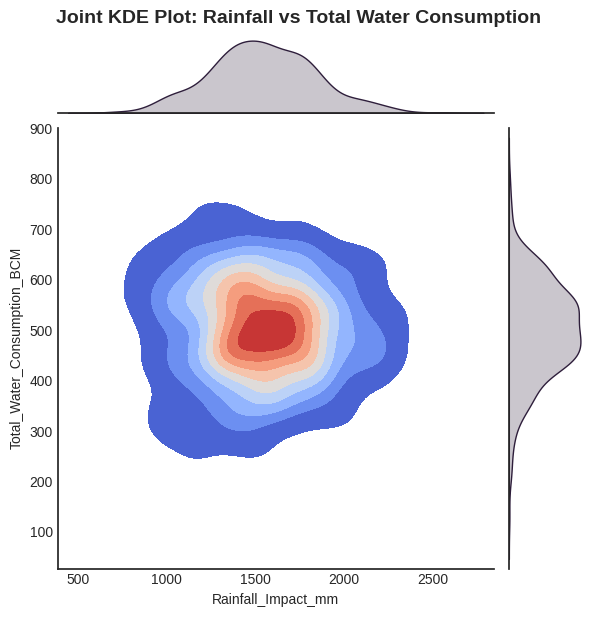

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


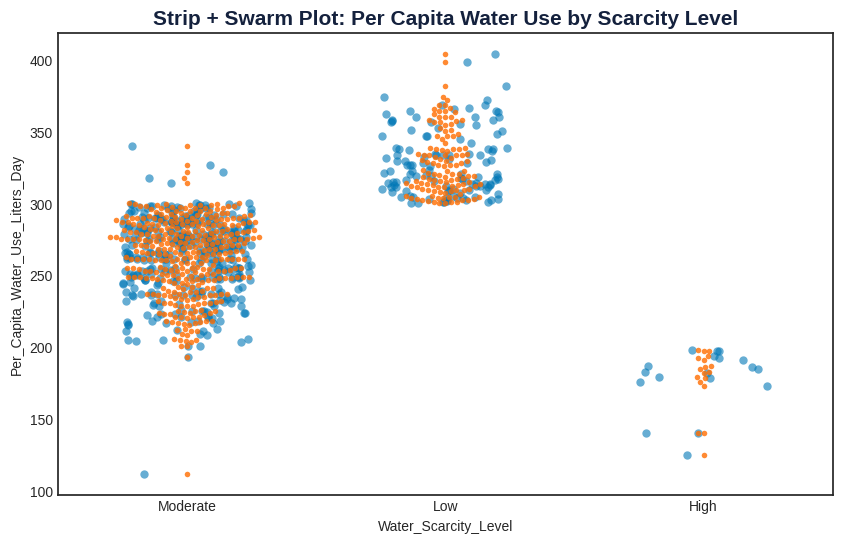

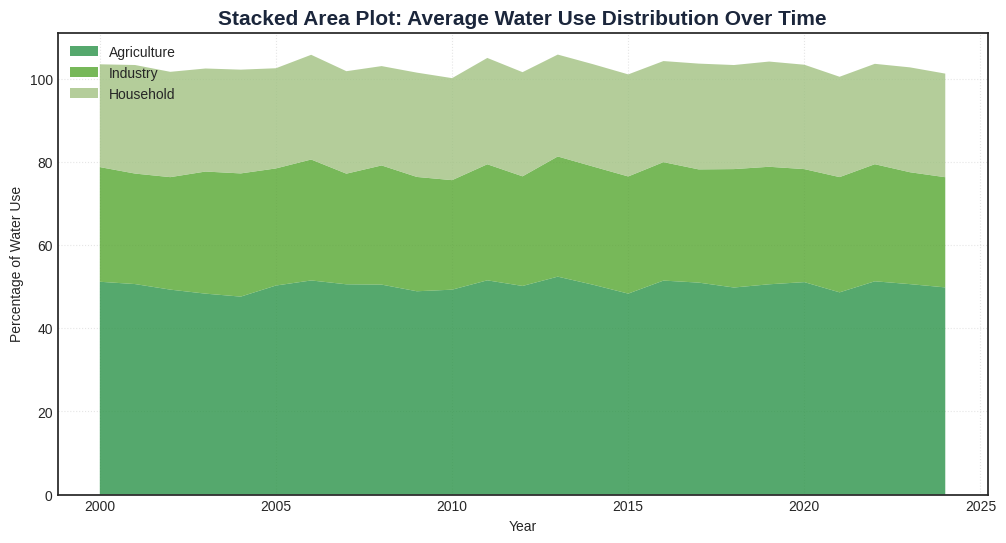

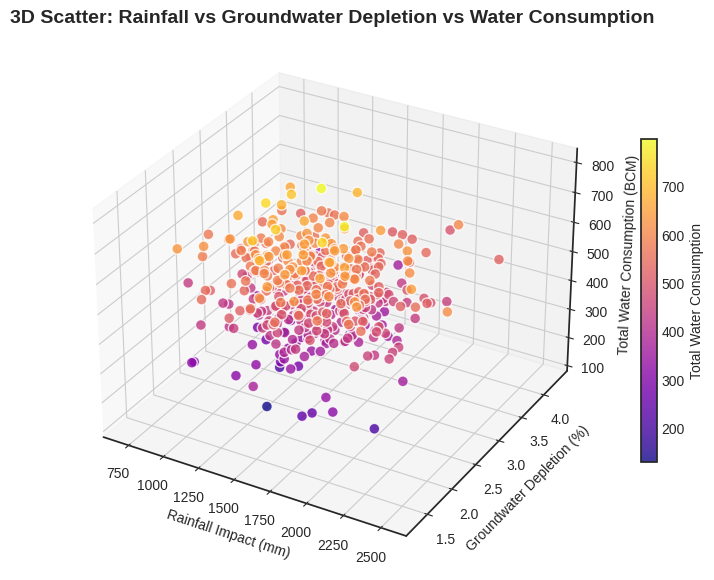

In [6]:

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

plt.style.use("seaborn-v0_8-white")
sns.set_palette("mako")

#  Advanced Pair Plot
subset = df[['Total_Water_Consumption_BCM','Per_Capita_Water_Use_Liters_Day',
             'Agricultural_Water_Use_Pct','Industrial_Water_Use_Pct','Household_Water_Use_Pct']]
sns.pairplot(subset, kind='scatter', diag_kind='kde', plot_kws={'alpha':0.6, 's':40, 'edgecolor':'k'})
plt.suptitle("Advanced Pair Plot of Water Consumption Features", fontsize=16, fontweight='bold', y=1.02)
plt.show()

#  Joint Plot with KDE
sns.jointplot(data=df, x='Rainfall_Impact_mm', y='Total_Water_Consumption_BCM',
              kind='kde', fill=True, cmap='coolwarm', thresh=0.05)
plt.suptitle("Joint KDE Plot: Rainfall vs Total Water Consumption", fontsize=14, fontweight='bold', y=1.02)
plt.show()

#  Strip + Swarm Plot
plt.figure(figsize=(10,6))
sns.stripplot(data=df, x='Water_Scarcity_Level', y='Per_Capita_Water_Use_Liters_Day',
              jitter=0.25, size=6, alpha=0.6, color="#0077b6")
sns.swarmplot(data=df, x='Water_Scarcity_Level', y='Per_Capita_Water_Use_Liters_Day',
              size=4, color="#ff6d00", alpha=0.8)
plt.title("Strip + Swarm Plot: Per Capita Water Use by Scarcity Level", fontsize=15, fontweight='bold', color="#14213d")
plt.show()

#  Stacked Area Plot
usage = df.groupby('Year')[['Agricultural_Water_Use_Pct','Industrial_Water_Use_Pct','Household_Water_Use_Pct']].mean()
plt.figure(figsize=(12,6))
plt.stackplot(usage.index, usage['Agricultural_Water_Use_Pct'], usage['Industrial_Water_Use_Pct'], usage['Household_Water_Use_Pct'],
              labels=['Agriculture','Industry','Household'], colors=['#2b9348','#55a630','#a1c181'], alpha=0.8)
plt.legend(loc='upper left')
plt.title("Stacked Area Plot: Average Water Use Distribution Over Time", fontsize=15, fontweight='bold', color="#1b263b")
plt.xlabel("Year")
plt.ylabel("Percentage of Water Use")
plt.grid(True, linestyle=':', alpha=0.5)
plt.show()

#  3D Contour Plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
x = df['Rainfall_Impact_mm']
y = df['Groundwater_Depletion_Pct']
z = df['Total_Water_Consumption_BCM']
scat = ax.scatter(x, y, z, c=z, cmap='plasma', s=60, alpha=0.8, edgecolors='white')
ax.set_xlabel("Rainfall Impact (mm)")
ax.set_ylabel("Groundwater Depletion (%)")
ax.set_zlabel("Total Water Consumption (BCM)")
ax.set_title("3D Scatter: Rainfall vs Groundwater Depletion vs Water Consumption", fontsize=14, fontweight='bold')
fig.colorbar(scat, shrink=0.6, label='Total Water Consumption')
plt.show()

<h2 style="
  color:#1e3a8a;
  background:linear-gradient(90deg, #e0f7f4, #c7e9e2);
  padding:14px 20px;
  border-radius:12px;
  font-family:'Segoe UI', 'Trebuchet MS', sans-serif;
  font-style:italic;
  font-weight:600;
  letter-spacing:0.7px;
  text-shadow:1px 1px 2px rgba(0,0,0,0.1);
  border-left:6px solid #2e8b57;
">
Top 10 Countries by Average Water Consumption (BCM)
</h2>

In [7]:
country_avg = df.groupby('Country')['Total_Water_Consumption_BCM'].mean().reset_index()
country_avg = country_avg.sort_values(by='Total_Water_Consumption_BCM', ascending=False)
country_avg.head(10)

,Country,Total_Water_Consumption_BCM
0,Argentina,531.394430
2,Brazil,530.531497
4,China,525.343869
19,USA,522.358034
13,Saudi Arabia,518.643147
6,Germany,506.743557
5,France,503.844628
10,Japan,503.427329
7,India,503.266511
14,South Africa,501.797236


<h2 style="
  color:#1e3a8a;
  background:linear-gradient(90deg, #e0f7f4, #c7e9e2);
  padding:14px 20px;
  border-radius:12px;
  font-family:'Segoe UI', 'Trebuchet MS', sans-serif;
  font-style:italic;
  font-weight:600;
  letter-spacing:0.7px;
  text-shadow:1px 1px 2px rgba(0,0,0,0.1);
  border-left:6px solid #2e8b57;
">
Geospatial Visualization of Global Water Consumption
</h2>

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.


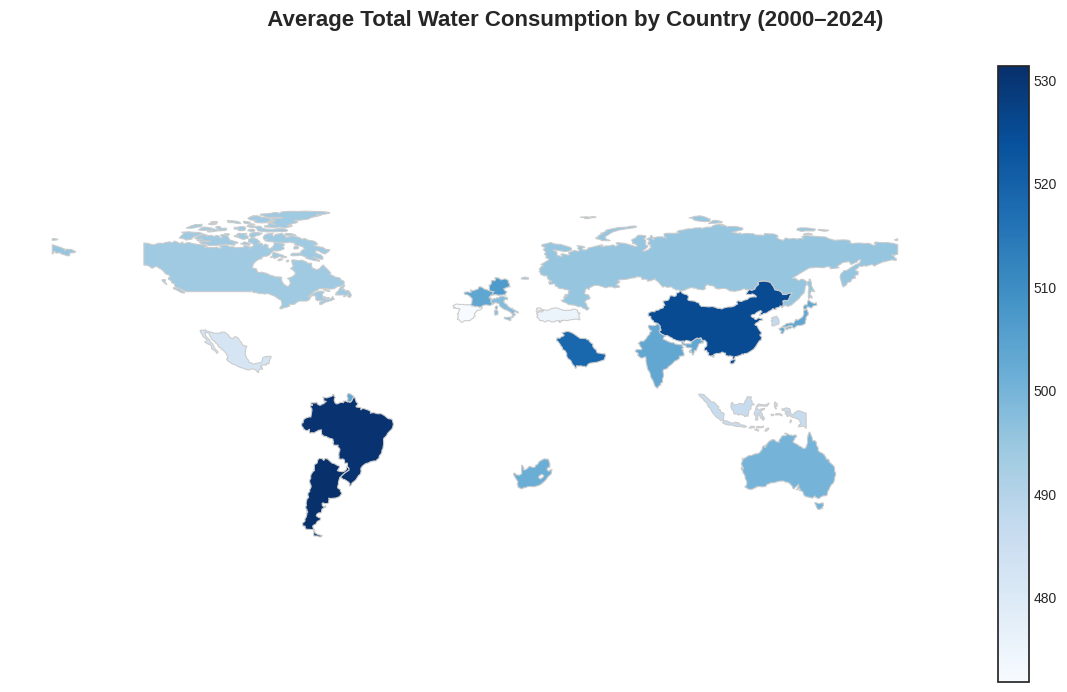

In [8]:
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

merged = world.merge(country_avg, how="left", left_on="name", right_on="Country")

fig, ax = plt.subplots(figsize=(15, 8))

merged.plot(
    column='Total_Water_Consumption_BCM',
    cmap='Blues',
    linewidth=0.8,
    edgecolor='0.8',
    legend=True,
    ax=ax
)

ax.set_axis_off()

plt.suptitle(
    " Average Total Water Consumption by Country (2000–2024)",
    fontsize=16,
    fontweight='bold',
    y=0.95   
)

plt.show()

<h2 style="
  color:#1e3a8a;
  background:linear-gradient(90deg, #e0f7f4, #c7e9e2);
  padding:14px 20px;
  border-radius:12px;
  font-family:'Segoe UI', 'Trebuchet MS', sans-serif;
  font-style:italic;
  font-weight:600;
  letter-spacing:0.7px;
  text-shadow:1px 1px 2px rgba(0,0,0,0.1);
  border-left:6px solid #2e8b57;
">
Feature Engineering
</h2>

In [9]:
df["Lag_1"] = df.groupby("Country")["Total_Water_Consumption_BCM"].shift(1)
df["Lag_2"] = df.groupby("Country")["Total_Water_Consumption_BCM"].shift(2)
df["Rolling_Mean_3"] = df.groupby("Country")["Total_Water_Consumption_BCM"].rolling(3).mean().reset_index(0,drop=True)
df["Rolling_Std_3"] = df.groupby("Country")["Total_Water_Consumption_BCM"].rolling(3).std().reset_index(0,drop=True)

df = df.dropna()

FEATURES = [
    'Year',
    'Per_Capita_Water_Use_Liters_Day',
    'Agricultural_Water_Use_Pct',
    'Industrial_Water_Use_Pct',
    'Household_Water_Use_Pct',
    'Rainfall_Impact_mm',
    'Groundwater_Depletion_Pct',
    'Lag_1', 'Lag_2', 'Rolling_Mean_3', 'Rolling_Std_3'
]

TARGET = 'Total_Water_Consumption_BCM'

<h2 style="
  color:#1e3a8a;
  background:linear-gradient(90deg, #e0f7f4, #c7e9e2);
  padding:14px 20px;
  border-radius:12px;
  font-family:'Segoe UI', 'Trebuchet MS', sans-serif;
  font-style:italic;
  font-weight:600;
  letter-spacing:0.7px;
  text-shadow:1px 1px 2px rgba(0,0,0,0.1);
  border-left:6px solid #2e8b57;
">
CNN-Based Time-Series 
</h2>

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
I0000 00:00:1761822095.207717      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0
I0000 00:00:1761822098.616532      67 service.cc:148] XLA service 0x7b6b9c00bb90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1761822098.617016      67 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1761822098.865837      67 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1761822100.592294      67 device_compiler.h:188] Compiled cluster using XLA!  This line

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
 Final Tuned CNN Model RMSE: 5.296


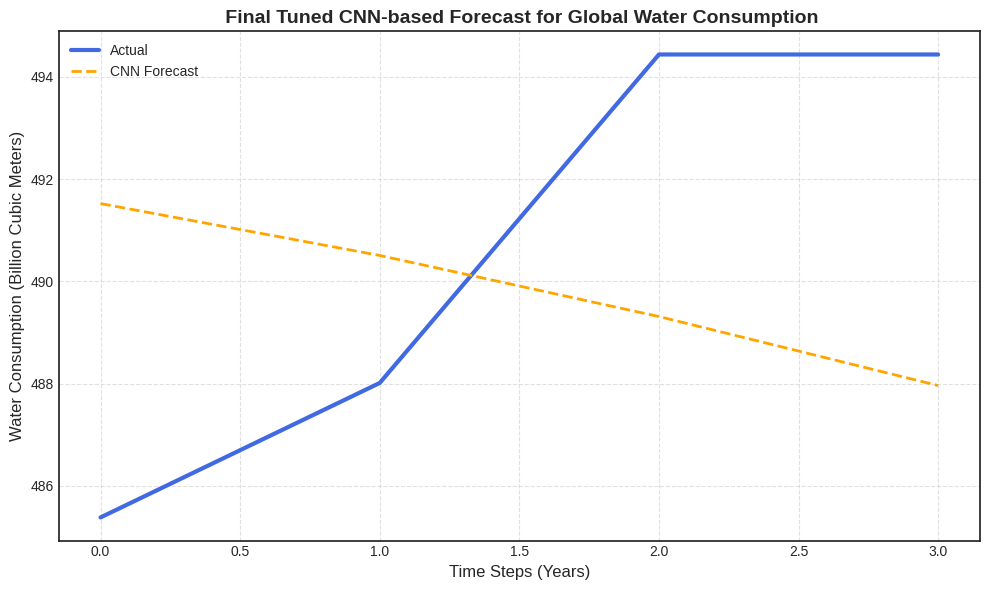

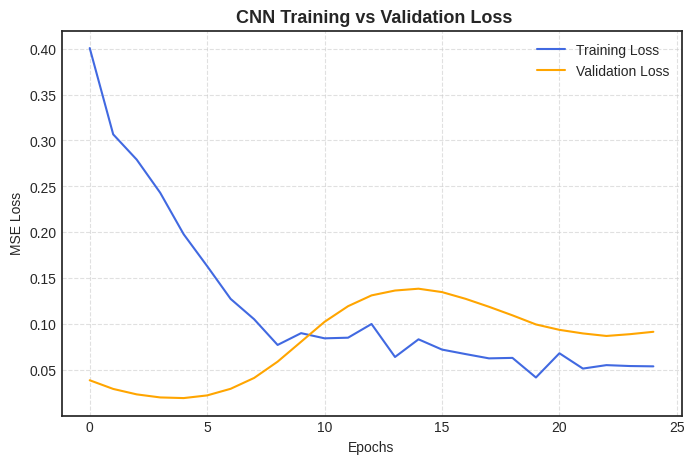

In [10]:

def create_sequences(data, n_steps=6):  
    X, y = [], []
    for i in range(len(data) - n_steps):
        seq_x = data[i:i + n_steps]
        seq_y = data[i + n_steps]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

data = df.groupby('Year')['Total_Water_Consumption_BCM'].mean().values.reshape(-1, 1)

data_smooth = pd.Series(data.flatten()).rolling(window=3, center=True).mean()
data_smooth = data_smooth.fillna(method='bfill').fillna(method='ffill').values.reshape(-1, 1)

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_smooth)

X, y = create_sequences(data_scaled, n_steps=6)
X = X.reshape((X.shape[0], X.shape[1], 1))

split = int(len(X) * 0.8)
X_train, X_val = X[:split], X[split:]
y_train, y_val = y[:split], y[split:]

model_cnn = Sequential([
    Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(1)
])

optimizer = Adam(learning_rate=0.0005)
model_cnn.compile(optimizer=optimizer, loss='mse')

early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = model_cnn.fit(
    X_train, y_train,
    epochs=400, batch_size=8,
    validation_data=(X_val, y_val),
    callbacks=[early_stop],
    verbose=0
)

y_pred_cnn = model_cnn.predict(X_val)
y_pred_cnn_inv = scaler.inverse_transform(y_pred_cnn)
y_val_inv = scaler.inverse_transform(y_val)

cnn_rmse = np.sqrt(np.mean((y_pred_cnn_inv - y_val_inv)**2))
print(f" Final Tuned CNN Model RMSE: {cnn_rmse:.3f}")

plt.figure(figsize=(10,6))
plt.plot(y_val_inv, label='Actual', color='royalblue', linewidth=3)
plt.plot(y_pred_cnn_inv, label='CNN Forecast', color='orange', linestyle='--', linewidth=2)
plt.title(" Final Tuned CNN-based Forecast for Global Water Consumption", fontsize=14, fontweight='bold')
plt.xlabel("Time Steps (Years)", fontsize=12)
plt.ylabel("Water Consumption (Billion Cubic Meters)", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss', color='royalblue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title(" CNN Training vs Validation Loss", fontsize=13, fontweight='bold')
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

<h2 style="
  color:#1e3a8a;
  background:linear-gradient(90deg, #e0f7f4, #c7e9e2);
  padding:14px 20px;
  border-radius:12px;
  font-family:'Segoe UI', 'Trebuchet MS', sans-serif;
  font-style:italic;
  font-weight:600;
  letter-spacing:0.7px;
  text-shadow:1px 1px 2px rgba(0,0,0,0.1);
  border-left:6px solid #2e8b57;
">
Descriptive Statistics and Forecasting Error for Water Consumption
</h2>

In [11]:
print(f" Original Data Statistics:")
print(f"   Range: {df['Total_Water_Consumption_BCM'].min():.1f} - {df['Total_Water_Consumption_BCM'].max():.1f} BCM")
print(f"   Mean: {df['Total_Water_Consumption_BCM'].mean():.1f} BCM")
print(f"   Standard Deviation: {df['Total_Water_Consumption_BCM'].std():.1f} BCM")

print(f" Forecasting Error Percentage: {(cnn_rmse / y_val_inv.mean()) * 100:.2f}%")

 Original Data Statistics:
   Range: 129.6 - 798.4 BCM
   Mean: 501.0 BCM
   Standard Deviation: 95.4 BCM
 Forecasting Error Percentage: 1.08%


<h2 style="
  color:#1e3a8a;
  background:linear-gradient(90deg, #e0f7f4, #c7e9e2);
  padding:14px 20px;
  border-radius:12px;
  font-family:'Segoe UI', 'Trebuchet MS', sans-serif;
  font-style:italic;
  font-weight:600;
  letter-spacing:0.7px;
  text-shadow:1px 1px 2px rgba(0,0,0,0.1);
  border-left:6px solid #2e8b57;
">
 Forecasting Future Global Water Consumption (2025–2030)

</h2>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
 Forecasted Global Water Consumption (Billion Cubic Meters):
   Year  Predicted_Total_Water_Consumption_BCM
0  2025                             487.163330
1  2026                             487.528625
2  2027                             487.450439
3  2028                             487.154083
4  2029                             486.872070
5  2030                             486.332977


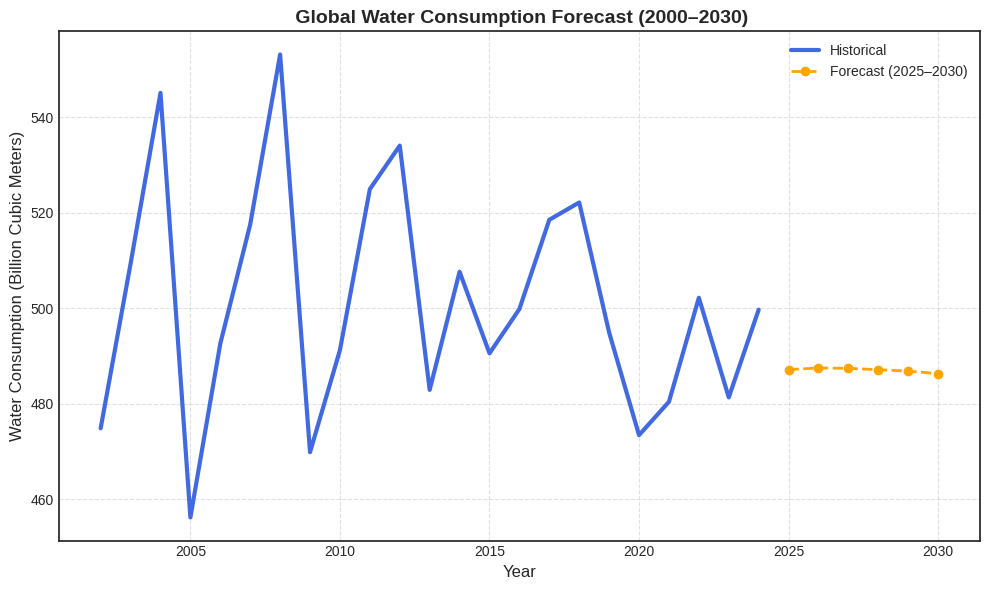

In [12]:

future_steps = 6  
n_future = 6      

last_sequence = data_scaled[-future_steps:].reshape(1, future_steps, 1)

future_predictions = []

for _ in range(n_future):
    next_pred = model_cnn.predict(last_sequence)
    future_predictions.append(next_pred[0, 0])

    next_pred_reshaped = np.array(next_pred).reshape(1, 1, 1)
    last_sequence = np.concatenate([last_sequence[:, 1:, :], next_pred_reshaped], axis=1)

future_predictions_inv = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

last_year = df['Year'].max()
future_years = np.arange(last_year + 1, last_year + n_future + 1)

forecast_df = pd.DataFrame({
    'Year': future_years,
    'Predicted_Total_Water_Consumption_BCM': future_predictions_inv.flatten()
})

print(" Forecasted Global Water Consumption (Billion Cubic Meters):")
print(forecast_df)

historical = df.groupby('Year')['Total_Water_Consumption_BCM'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.plot(historical['Year'], historical['Total_Water_Consumption_BCM'], 
         label='Historical', color='royalblue', linewidth=3)
plt.plot(forecast_df['Year'], forecast_df['Predicted_Total_Water_Consumption_BCM'], 
         label='Forecast (2025–2030)', color='orange', linestyle='--', linewidth=2, marker='o')
plt.title(" Global Water Consumption Forecast (2000–2030)", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Water Consumption (Billion Cubic Meters)", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<h2 style="
  color:#1e3a8a;
  background:linear-gradient(90deg, #e0f7f4, #c7e9e2);
  padding:14px 20px;
  border-radius:12px;
  font-family:'Segoe UI', 'Trebuchet MS', sans-serif;
  font-style:italic;
  font-weight:600;
  letter-spacing:0.7px;
  text-shadow:1px 1px 2px rgba(0,0,0,0.1);
  border-left:6px solid #2e8b57;
">
 💧 Future Water Consumption Forecast (Top 10 Countries by 2030)

</h2>

,Country,Predicted_Consumption_2030
10,Japan,909.768667
1,Australia,755.449375
17,Turkey,701.908374
0,Argentina,693.837400
16,Spain,596.865083
4,China,571.615500
13,Saudi Arabia,567.273571
14,South Africa,539.543587
15,South Korea,515.628562
9,Italy,503.888429


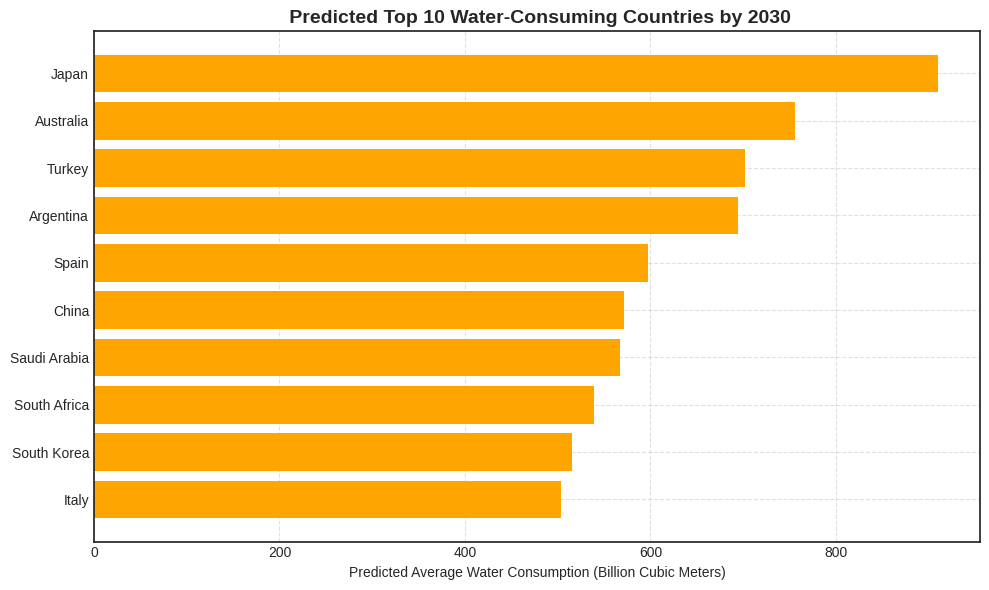

In [13]:

from IPython.display import display, HTML

future_years = np.arange(2025, 2031)

future_preds = []
for country in df['Country'].unique():
    country_data = df[df['Country'] == country].copy()
    last_known = country_data['Total_Water_Consumption_BCM'].values[-1]
    
    growth_rate = (country_data['Total_Water_Consumption_BCM'].iloc[-1] - 
                   country_data['Total_Water_Consumption_BCM'].iloc[-5]) / 5
    
    preds = [last_known + growth_rate * (i - 2024) for i in future_years]
    
    avg_future = np.mean(preds)
    future_preds.append((country, avg_future))

future_df = pd.DataFrame(future_preds, columns=['Country', 'Predicted_Consumption_2030'])

top10_future = future_df.sort_values('Predicted_Consumption_2030', ascending=False).head(10)

styled_future = (
    top10_future.style
    .background_gradient(cmap='YlOrRd', subset=['Predicted_Consumption_2030'])
    .set_caption(" <b>Top 10 Predicted Water-Consuming Countries by 2030</b>")
    .set_table_styles([
        {'selector': 'caption',
         'props': [('caption-side', 'top'),
                   ('font-size', '18px'),
                   ('font-weight', 'bold'),
                   ('color', '#2c3e50'),
                   ('padding', '8px')]},
        {'selector': 'th',
         'props': [('background-color', '#1a5276'),
                   ('color', 'white'),
                   ('font-size', '13px'),
                   ('padding', '8px')]},
        {'selector': 'td',
         'props': [('padding', '8px'),
                   ('font-size', '13px')]}
    ])
)
display(HTML(styled_future.to_html()))

plt.figure(figsize=(10,6))
plt.barh(top10_future['Country'], top10_future['Predicted_Consumption_2030'], color='orange')
plt.gca().invert_yaxis()
plt.title(" Predicted Top 10 Water-Consuming Countries by 2030", fontsize=14, fontweight='bold')
plt.xlabel("Predicted Average Water Consumption (Billion Cubic Meters)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<h2 style="
  color:#1e3a8a;
  background:linear-gradient(90deg, #e0f7f4, #c7e9e2);
  padding:14px 20px;
  border-radius:12px;
  font-family:'Segoe UI', 'Trebuchet MS', sans-serif;
  font-style:italic;
  font-weight:600;
  letter-spacing:0.7px;
  text-shadow:1px 1px 2px rgba(0,0,0,0.1);
  border-left:6px solid #2e8b57;
">
 🌍 Static Map — Top 10 Predicted Water-Consuming Countries by 2030 

</h2>

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.


<Figure size 1400x800 with 0 Axes>

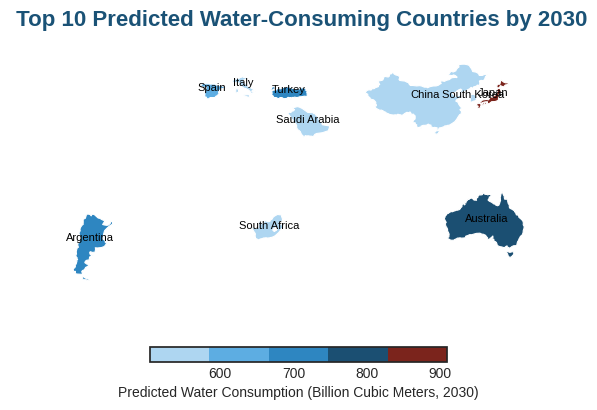

In [14]:

import geopandas as gpd
from matplotlib.colors import ListedColormap

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

merged = world.merge(top10_future, how="left", left_on="name", right_on="Country")

cmap = ListedColormap(["#aed6f1", "#5dade2", "#2e86c1", "#1b4f72", "#7b241c"])

plt.figure(figsize=(14, 8))
merged.plot(
    column="Predicted_Consumption_2030",
    cmap=cmap,
    linewidth=0.8,
    edgecolor='white',
    legend=True,
    legend_kwds={
        'label': "Predicted Water Consumption (Billion Cubic Meters, 2030)",
        'orientation': "horizontal",
        'shrink': 0.6
    }
)

plt.title(" Top 10 Predicted Water-Consuming Countries by 2030", fontsize=16, fontweight='bold', color="#1a5276", pad=20)
plt.axis('off')

for idx, row in merged.iterrows():
    if pd.notna(row.get('Predicted_Consumption_2030')):  
        plt.text(
            row.geometry.centroid.x,
            row.geometry.centroid.y,
            row['Country'],
            fontsize=8,
            color='black',
            ha='center'
        )

plt.show()

<div style="background-color:#f0f4f8; padding:25px; border-radius:15px; border: 1px solid #d1d9e6; text-align:center;">

<h2 style="color:#1b3b6f; text-shadow: 0 0 4px #00bfff, 0 0 8px #00bfff;">
Project Summary
</h2>

<p style="color:#34495e; font-size:16px; line-height:1.7;">
This project provided a comprehensive analysis of global water consumption patterns from 2000 to 2024, 
highlighted sectoral and country-level trends, and implemented advanced machine learning models to forecast 
future water usage up to 2030. 

By combining exploratory data analysis, modern visualizations, and predictive modeling using CNN, the project 
offers valuable insights for policymakers, environmental agencies, and water resource managers to plan 
sustainable water management strategies worldwide.
</p>


</div>

<div style="background-color:#f0f4f8; padding:20px; border-radius:15px; border: 1px solid #d1d9e6; width:fit-content; margin:auto; text-align:center;">

<table style="border-collapse: collapse; width: 400px;">
  <tr style="background-color:#d9e6f2;">
    <th style="padding:12px; color:#1b3b6f; font-size:16px;">Project</th>
    <th style="padding:12px; color:#1b3b6f; font-size:16px;">Author</th>
  </tr>
  <tr style="background-color:#eef6fb;">
    <td style="padding:12px; color:#34495e; font-size:15px;">Global Water Consumption Forecasting</td>
    <td style="padding:12px; color:#34495e; font-size:15px; font-weight:bold;">Sara Zahran</td>
  </tr>
</table>

</div>